In [19]:
ins=[]
ins.append('ma')
ins

['ma']

In [ ]:
name = './Config/evening_peak_etth.yaml'
name 

In [20]:
ins = {'morning_peak':'MP', 'evening_peak':'EP'}
ins['morning_peak']
# ins.keys()

'MP'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re

In [2]:
ett = pd.read_csv('ETTh.csv')
ett

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [6]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('ETTh.csv')
data
data.drop(data.columns[0], axis=1, inplace=True)
scaler = MinMaxScaler()
data = data.iloc[:,0:1]
scaler = scaler.fit(data)

data = scaler.transform(data)
print("各特征最小值:", scaler.data_min_)
print("各特征最大值:", scaler.data_max_)
print("各特征的缩放比例:", scaler.scale_)
print("各特征的偏移量:", scaler.min_)

# 各特征最小值: [-22.70599937  -4.75600004 -25.08799934  -5.93400002  -1.18799996
#   -1.37100005  -4.07999992]
# 各特征最大值: [23.6439991  10.11400032 17.3409996   7.74700022  8.49800014  3.046
#  46.00699997]
# 各特征的缩放比例: [0.02157497 0.06724949 0.02356879 0.07309407 0.10324179 0.226398
#  0.01996526]
# 各特征的偏移量: [0.48988134 0.3198386  0.59129369 0.43374022 0.12265124 0.31039168
#  0.08145826]

各特征最小值: [-22.70599937]
各特征最大值: [23.6439991]
各特征的缩放比例: [0.02157497]
各特征的偏移量: [0.48988134]


selected_vars 的形状： (17420, 2)


/tmp/ipykernel_1167842/2186719388.py:20: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/2186719388.py:20: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/2186719388.py:20: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/2186719388.py:20: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/2186719388.py:20: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/2186719388.py:20: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/2186719388.py:20: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from curren

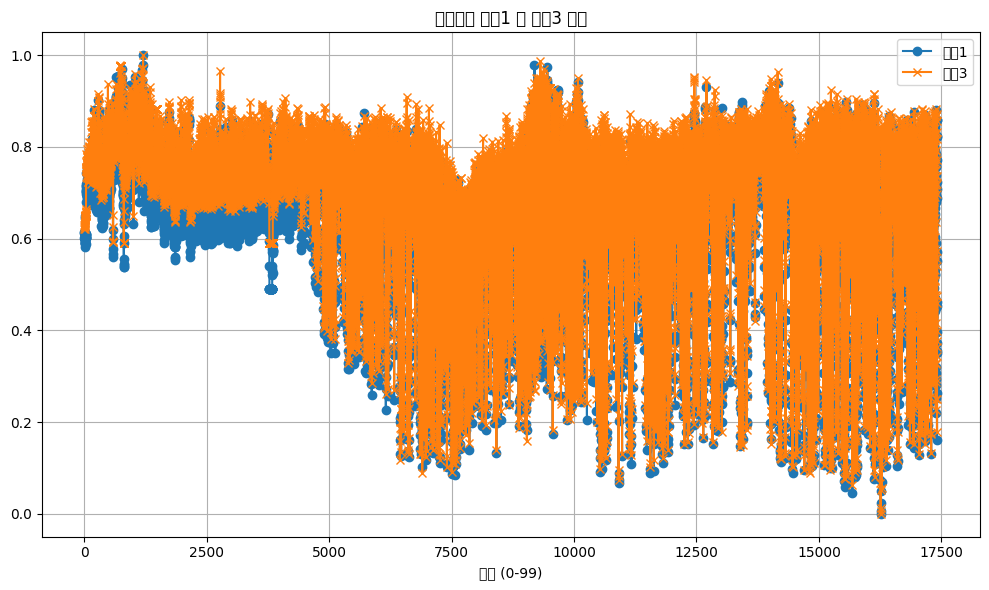

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

ett = pd.read_csv('ETTh.csv').values[:,1:]
scaler = MinMaxScaler()
A_norm = scaler.fit_transform(ett)

# 取出数据：假设 ett 是你的 DataFrame，取前 100 行，从第 2 列开始（共 7 列）
selected_vars = A_norm[:, [0, 2]]
print("selected_vars 的形状：", selected_vars.shape)

# 绘图，将变量1和变量3画在同一张图上，使用不同颜色
plt.figure(figsize=(10, 6))
plt.plot(selected_vars[:, 0], label='变量1', marker='o')
plt.plot(selected_vars[:, 1], label='变量3', marker='x')
plt.xlabel('索引 (0-99)')
plt.title('归一化后 变量1 和 变量3 对比')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()


A 的形状： (500, 7)


/tmp/ipykernel_1167842/419115804.py:24: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/419115804.py:24: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/419115804.py:24: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/419115804.py:24: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/419115804.py:24: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/419115804.py:24: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_1167842/419115804.py:24: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.

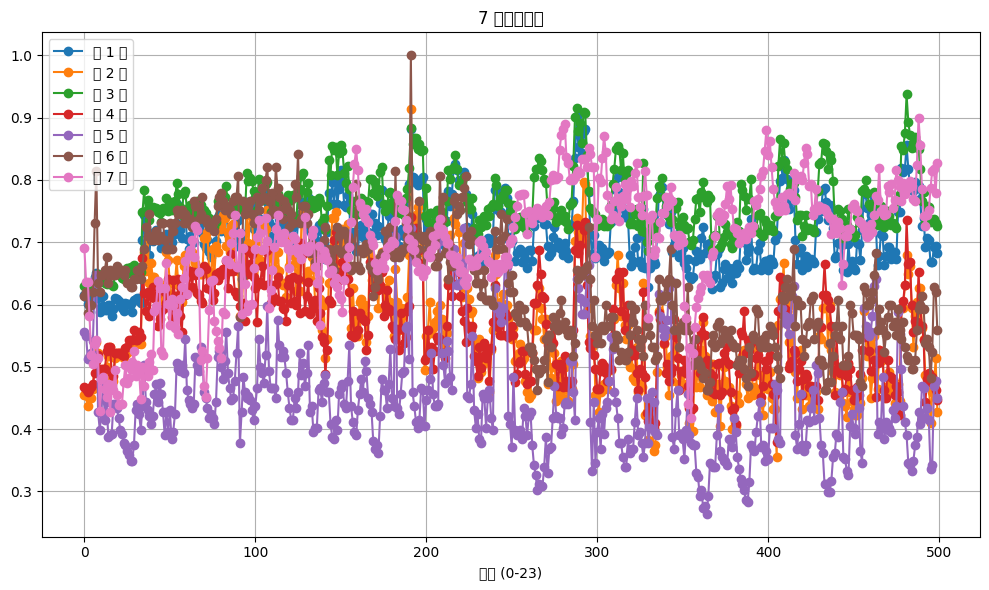

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

ett = pd.read_csv('ETTh.csv').values[:,1:]
scaler = MinMaxScaler()
A_norm = scaler.fit_transform(ett)

# 取出数据：假设 ett 是你的 DataFrame，取前 100 行，从第 2 列开始（共 7 列）
A = A_norm[:500, ]
print("A 的形状：", A.shape)

# 创建一个图形和一个坐标轴
fig, ax = plt.subplots(figsize=(10, 6))

# 遍历 7 列数据，依次绘制在同一张图上，自动使用不同颜色
for i in range(A.shape[1]):
    ax.plot(A[:, i], label=f'第 {i+1} 列', marker='o')

ax.set_xlabel('索引 (0-23)')
ax.set_title('7 列数据对比')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


(100, 7)


/tmp/ipykernel_39166/1815438852.py:14: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_39166/1815438852.py:14: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_39166/1815438852.py:14: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_39166/1815438852.py:14: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_39166/1815438852.py:14: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_39166/1815438852.py:14: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_39166/1815438852.py:14: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from current font.
  plt.

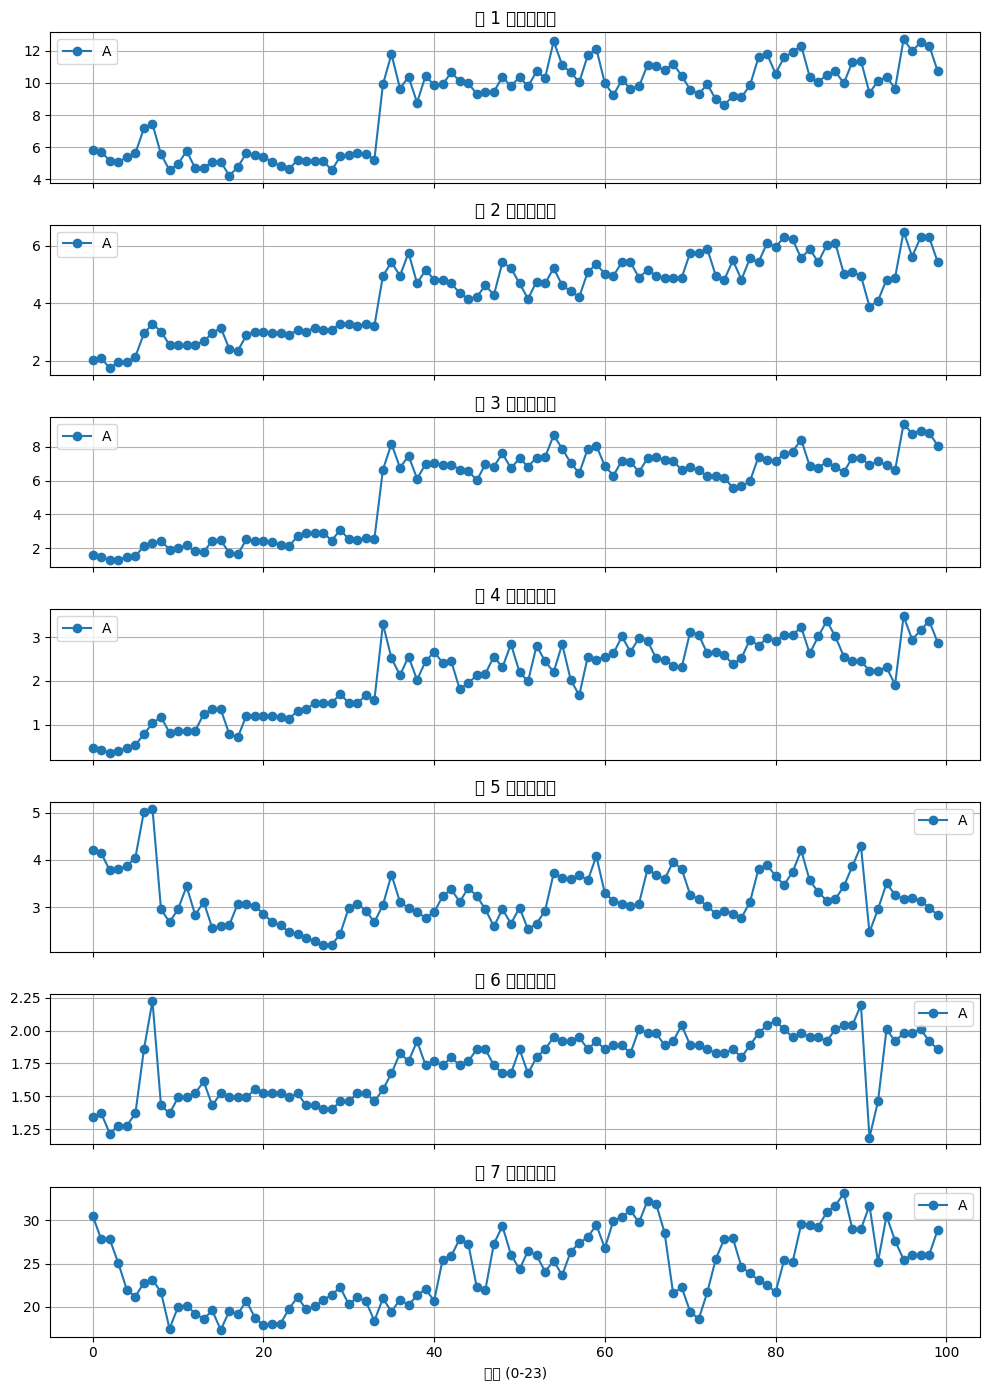

In [8]:
# 创建 7 个子图，共享 x 轴
A = ett.values[:100,1:]
print(A.shape)
fig, axes = plt.subplots(7, 1, figsize=(10, 14), sharex=True)

for i in range(7):
    axes[i].plot(A[:, i], label='A', marker='o')
    # axes[i].plot(B[:, i], label='B', marker='x')
    axes[i].set_title(f'第 {i+1} 列数据对比')
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel('索引 (0-23)')
plt.tight_layout()
plt.show()

In [33]:
import chinese_calendar  as cc
from chinese_calendar  import is_workday, is_holiday

ett['date'] = pd.to_datetime(ett['date'])

# check workday or holiday
ett['is_workday'] = ett['date'].apply(lambda x: is_workday(x) and not is_holiday(x))

# dataset separation
workdays_df = ett[ett['is_workday']]
non_workdays_df = ett[~ett['is_workday']]
workdays_df.iloc[:,:-1]
# # save data
workdays_df.iloc[:,:-1].to_csv('workdays_etth.csv', index=False)
non_workdays_df.iloc[:,:-1].to_csv('non_workdays_etth.csv', index=False)
# non_workdays_df.to_csv('non_workdays_data.csv', index=False)

In [31]:
workdays_df = pd.read_csv('workdays_etth.csv')
workdays_df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
11895,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
11896,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
11897,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
11898,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [32]:
non_workdays_df.iloc[:,:-1]

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
24,2016-07-02 00:00:00,5.224,3.081,2.701,1.315,2.437,1.523,21.104000
25,2016-07-02 01:00:00,5.157,3.014,2.878,1.350,2.345,1.432,19.697001
26,2016-07-02 02:00:00,5.157,3.148,2.878,1.492,2.284,1.432,20.049000
27,2016-07-02 03:00:00,5.157,3.081,2.914,1.492,2.193,1.401,20.752001
28,2016-07-02 04:00:00,4.555,3.081,2.452,1.492,2.193,1.401,21.385000
...,...,...,...,...,...,...,...,...
17371,2018-06-24 19:00:00,7.636,2.344,5.082,1.173,2.559,0.975,9.075000
17372,2018-06-24 20:00:00,8.239,2.344,5.437,0.995,2.802,0.944,8.864000
17373,2018-06-24 21:00:00,9.578,2.411,7.249,1.208,2.589,1.005,8.371000
17374,2018-06-24 22:00:00,10.516,3.952,7.604,1.812,2.376,0.975,8.371000


In [5]:
df = pd.read_csv('ETTh.csv')
df['date'] = pd.to_datetime(df['date'])
# ett['morning_peak'] = ett['date'].dt.hour.apply(lambda x: 'day' if 7 <= x < 10 )
mask = (df['date'].dt.time >= pd.Timestamp('07:00:00').time()) & (df['date'].dt.time <= pd.Timestamp('10:00:00').time())
filtered_data = df.loc[mask]
filtered_data

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
7,2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999
8,2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000
9,2016-07-01 09:00:00,4.555,2.545,1.919,0.817,2.680,1.371,17.445999
10,2016-07-01 10:00:00,4.957,2.545,1.990,0.853,2.955,1.492,19.979000
31,2016-07-02 07:00:00,5.626,3.215,2.487,1.492,3.076,1.523,21.104000
...,...,...,...,...,...,...,...,...
17386,2018-06-25 10:00:00,-9.042,4.756,-12.579,2.594,3.777,1.340,11.185000
17407,2018-06-26 07:00:00,10.784,6.028,4.513,2.665,5.726,2.163,9.638000
17408,2018-06-26 08:00:00,3.751,5.760,-2.168,3.340,5.879,2.284,9.426000
17409,2018-06-26 09:00:00,-4.287,5.693,-8.209,3.376,3.472,1.858,9.075000


In [6]:
# check morning peak  or evening peak
ett = pd.read_csv('ETTh.csv')
ett['date'] = pd.to_datetime(ett['date'])
mask = (ett['date'].dt.time >= pd.Timestamp('07:00:00').time()) & (ett['date'].dt.time <= pd.Timestamp('10:00:00').time())
mask = (ett['date'].dt.time >= pd.Timestamp('07:00:00').time()) & (ett['date'].dt.time <= pd.Timestamp('10:00:00').time())
filtered_data = ett.loc[mask]


filtered_data.to_csv('morning_peak_etth.csv', index=False)

filtered_data

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
7,2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999
8,2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000
9,2016-07-01 09:00:00,4.555,2.545,1.919,0.817,2.680,1.371,17.445999
10,2016-07-01 10:00:00,4.957,2.545,1.990,0.853,2.955,1.492,19.979000
31,2016-07-02 07:00:00,5.626,3.215,2.487,1.492,3.076,1.523,21.104000
...,...,...,...,...,...,...,...,...
17386,2018-06-25 10:00:00,-9.042,4.756,-12.579,2.594,3.777,1.340,11.185000
17407,2018-06-26 07:00:00,10.784,6.028,4.513,2.665,5.726,2.163,9.638000
17408,2018-06-26 08:00:00,3.751,5.760,-2.168,3.340,5.879,2.284,9.426000
17409,2018-06-26 09:00:00,-4.287,5.693,-8.209,3.376,3.472,1.858,9.075000


In [7]:
# check morning peak  or evening peak
ett = pd.read_csv('ETTh.csv')
ett['date'] = pd.to_datetime(ett['date'])
mask = (ett['date'].dt.time >= pd.Timestamp('17:00:00').time()) & (ett['date'].dt.time <= pd.Timestamp('20:00:00').time())
mask = (ett['date'].dt.time >= pd.Timestamp('17:00:00').time()) & (ett['date'].dt.time <= pd.Timestamp('20:00:00').time())
filtered_data = ett.loc[mask]


filtered_data.to_csv('evening_peak_etth.csv', index=False)

filtered_data

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
17,2016-07-01 17:00:00,4.756,2.344,1.635,0.711,3.076,1.492,19.134001
18,2016-07-01 18:00:00,5.626,2.880,2.523,1.208,3.076,1.492,20.681999
19,2016-07-01 19:00:00,5.492,3.014,2.452,1.208,3.015,1.553,18.712000
20,2016-07-01 20:00:00,5.358,3.014,2.452,1.208,2.863,1.523,17.868000
41,2016-07-02 17:00:00,9.913,4.823,6.894,2.416,3.229,1.736,25.466000
...,...,...,...,...,...,...,...,...
17395,2018-06-25 19:00:00,9.511,2.813,6.183,1.315,3.320,1.097,10.552000
17396,2018-06-25 20:00:00,12.994,3.483,8.457,1.635,4.447,1.249,9.989000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [37]:
# check day or night
ett = pd.read_csv('ETTh.csv')
ett['date'] = pd.to_datetime(ett['date'])
ett['day_or_night'] = ett['date'].dt.hour.apply(lambda x: 'day' if 6 <= x < 18 else 'night')

# data seperate
day_ett = ett[ett['day_or_night'] == 'day']
night_ett = ett[ett['day_or_night'] == 'night']
day_ett.iloc[:,:-1].to_csv('day_etth.csv', index=False)
night_ett.iloc[:,:-1].to_csv('night_etth.csv', index=False)
# non_workdays_df.to_csv('non_workdays_data.csv', index=False)
day_ett

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,day_or_night
6,2016-07-01 06:00:00,7.167,2.947,2.132,0.782,5.026,1.858,22.792000,day
7,2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999,day
8,2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000,day
9,2016-07-01 09:00:00,4.555,2.545,1.919,0.817,2.680,1.371,17.445999,day
10,2016-07-01 10:00:00,4.957,2.545,1.990,0.853,2.955,1.492,19.979000,day
...,...,...,...,...,...,...,...,...,...
17413,2018-06-26 13:00:00,-6.229,3.483,-9.666,1.528,3.137,1.310,9.426000,day
17414,2018-06-26 14:00:00,-1.273,3.617,-4.904,2.132,3.320,1.432,10.200000,day
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000,day
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000,day


In [38]:
day_ett = pd.read_csv('day_etth.csv')
day_ett

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 06:00:00,7.167,2.947,2.132,0.782,5.026,1.858,22.792000
1,2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999
2,2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000
3,2016-07-01 09:00:00,4.555,2.545,1.919,0.817,2.680,1.371,17.445999
4,2016-07-01 10:00:00,4.957,2.545,1.990,0.853,2.955,1.492,19.979000
...,...,...,...,...,...,...,...,...
8707,2018-06-26 13:00:00,-6.229,3.483,-9.666,1.528,3.137,1.310,9.426000
8708,2018-06-26 14:00:00,-1.273,3.617,-4.904,2.132,3.320,1.432,10.200000
8709,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
8710,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000


In [5]:
config=0

In [6]:
if config:
    print('yes')

In [41]:
energy = pd.read_csv('energy_data.csv')

'''
Data Origin
https://www.sciencedirect.com/science/article/pii/S0378778816308970?via=ihub
'''

energy

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [42]:
ener_train = pd.read_csv('training.csv')
ener_train

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,734.0,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,64200,Weekday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,2016-05-27 17:00:00,110,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,...,755.2,55.000000,3.000000,22.000000,13.400000,18.248201,18.248201,61200,Weekday,Friday
14799,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,...,755.2,55.333333,3.166667,22.833333,13.366667,16.966162,16.966162,61800,Weekday,Friday
14800,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,63000,Weekday,Friday
14801,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,64200,Weekday,Friday


In [43]:
ener_test = pd.read_csv('testing.csv')
ener_test

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.89,...,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.89,...,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.790000,44.900000,18.89,...,734.366667,91.333333,5.666667,40.000000,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.790000,44.826667,19.00,...,734.433333,91.166667,5.833333,40.000000,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.100000,48.466667,19.00,...,734.850000,89.500000,6.000000,40.000000,4.350000,24.884962,24.884962,70200,Weekday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,2016-05-27 13:50:00,230,0,25.500000,47.133333,26.600000,41.000000,28.200000,41.796667,24.60,...,755.850000,59.166667,1.833333,22.333333,13.500000,5.773431,5.773431,49800,Weekday,Friday
4928,2016-05-27 14:30:00,60,0,25.566667,46.633333,26.370000,41.378000,28.566667,41.156667,24.70,...,755.800000,59.000000,2.000000,21.500000,13.450000,8.991420,8.991420,52200,Weekday,Friday
4929,2016-05-27 15:50:00,100,0,25.500000,45.633333,26.080000,41.196000,28.133333,40.260000,24.70,...,755.550000,55.666667,2.000000,22.666667,13.216667,47.981309,47.981309,57000,Weekday,Friday
4930,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,...,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,62400,Weekday,Friday


In [44]:
ene = pd.concat([ener_train, ener_test],axis=0)
ene['date'] = pd.to_datetime(ene['date'])
ene.sort_values(by='date', inplace=True)
ene.iloc[:,:-3]

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
14800,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
4931,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
14801,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [50]:
import chinese_calendar  as cc
from chinese_calendar  import is_workday, is_holiday

ene = pd.concat([ener_train, ener_test],axis=0)
ene['date'] = pd.to_datetime(ene['date'])
ene.sort_values(by='date', inplace=True)
ene = ene.iloc[:,:-3]

ene['date'] = pd.to_datetime(ene['date'])

# check workday or holiday
ene['is_workday'] = ene['date'].apply(lambda x: is_workday(x) and not is_holiday(x))

# dataset separation
workdays_ene = ene[ene['is_workday']]
non_workdays_ene = ene[~ene['is_workday']]
workdays_ene.iloc[:,:-1]
# # save data
workdays_ene.iloc[:,:-1].to_csv('workdays_energy.csv', index=False)
non_workdays_ene.iloc[:,:-1].to_csv('non_workdays_energy.csv', index=False)
# non_workdays_df.to_csv('non_workdays_data.csv', index=False)

ene = pd.concat([ener_train, ener_test],axis=0)
ene['date'] = pd.to_datetime(ene['date'])
ene.sort_values(by='date', inplace=True)
ene = ene.iloc[:,:-3]
# check day or night

ene['day_or_night'] = ene['date'].dt.hour.apply(lambda x: 'day' if 6 <= x < 18 else 'night')

# 分离白天和黑夜的数据
day_ene = ene[ene['day_or_night'] == 'day']
night_ene = ene[ene['day_or_night'] == 'night']
day_ene.iloc[:,:-1].to_csv('day_energy.csv', index=False)
night_ene.iloc[:,:-1].to_csv('night_energy.csv', index=False)
# non_workdays_df.to_csv('non_workdays_data.csv', index=False)
day_ene.iloc[:,:-1]

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
3,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14799,2016-05-27 17:10:00,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,...,23.200000,46.7450,22.866667,755.2,55.333333,3.166667,22.833333,13.366667,16.966162,16.966162
4930,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
14800,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
4931,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [52]:
workdays_ene = pd.read_csv('workdays_energy.csv')
workdays_ene

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
13539,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
13540,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
13541,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
day_ene = pd.read_csv('day_energy.csv')
day_ene

In [16]:
'''
Google????  

https://finance.yahoo.com/quote/%5EVXGOG/
'''

stock = pd.read_csv('stock_data.csv')
stock



,Open,High,Low,Close,Adj_Close,Volume
0,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,52.140873,53.651051,51.604362,52.657513,52.657513,9257400
...,...,...,...,...,...,...
3680,1207.479980,1216.300049,1200.500000,1205.920044,1205.920044,1017800
3681,1205.939941,1215.670044,1204.130005,1215.000000,1215.000000,950000
3682,1214.989990,1216.219971,1205.030029,1207.150024,1207.150024,907200
3683,1207.890015,1208.689941,1199.859985,1203.839966,1203.839966,860200


In [17]:
stock.Open.max()

1271.0

In [1]:
import yfinance as yf

# Fetch Google stock data for the specified date range
google_stock = yf.download('GOOGL', start='2004-01-01', end='2019-12-31')

# Count the number of trading days with available data
trading_days_count = len(google_stock)
print(trading_days_count)


[*********************100%***********************]  1 of 1 completed

3868


In [7]:
import os
from scipy import io
fmri = io.loadmat('./fMRI/sim4.mat')['ts']
fmri.shape

(10000, 50)

In [9]:
fmri = io.loadmat('./fMRI/sim4.mat')
fmri

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Aug 24 15:45:42 2012',
 '__version__': '1.0',
 '__globals__': [],
 'ts': array([[-1.9256301 , -2.04509448, -1.44860076, ..., -2.55091622,
         -0.79340321, -2.35513002],
        [-0.65153503, -2.84865324, -1.95699317, ...,  0.05718938,
         -0.56402644, -0.80021807],
        [ 1.40210147, -0.74846544, -0.62276712, ...,  3.10532135,
          1.70841826,  0.36818903],
        ...,
        [-1.63657374,  1.74569851, -1.72245373, ...,  0.33893141,
         -0.32003467, -2.56861468],
        [ 0.30825418,  2.17259073,  4.28112913, ...,  0.83660549,
         -1.02419497, -3.10726055],
        [ 3.53006804,  2.97773296,  4.5670008 , ...,  2.78458588,
          0.84525203, -1.39603375]]),
 'net': array([[[-1.        ,  0.35674352,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        , -1.        ,  0.23344156, ...,  0.        ,
           0.        ,  0.        ],
         [ 0.

In [54]:
mujoco = np.load('mujoco.npy')
print('shape ',mujoco.shape)
mujoco

shape  (100, 100, 14)


array([[[1.0730922 , 0.16625899, 0.9304985 , ..., 2.090488  ,
         0.7760713 , 1.4482802 ],
        [1.0744435 , 0.16024394, 0.9286124 , ..., 2.0915098 ,
         0.77585053, 1.4482845 ],
        [1.0757959 , 0.1541302 , 0.9267283 , ..., 2.0925322 ,
         0.7756293 , 1.4482882 ],
        ...,
        [1.0991007 , 0.09363417, 0.91043955, ..., 2.0397787 ,
         0.7477329 , 1.4280124 ],
        [1.0990517 , 0.09362797, 0.91033417, ..., 2.0401466 ,
         0.7477325 , 1.4280156 ],
        [1.0990007 , 0.0936212 , 0.91022366, ..., 2.0405228 ,
         0.74773264, 1.4280177 ]],

       [[1.1642082 , 0.5365725 , 0.8264331 , ..., 2.004578  ,
         0.76847315, 1.3978573 ],
        [1.1670685 , 0.5335985 , 0.8277466 , ..., 2.0048149 ,
         0.76841146, 1.3979182 ],
        [1.1699295 , 0.53053856, 0.82905877, ..., 2.0050516 ,
         0.7683489 , 1.3979791 ],
        ...,
        [1.3780953 , 0.03927121, 0.8802937 , ..., 1.9722334 ,
         0.7881829 , 1.5640019 ],
        [1.3